Amplitude Amplification

In [29]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_histogram
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit import IBMQ, Aer, transpile, execute
from scipy.fft import fft
from math import pi
from qiskit.quantum_info import Statevector
from IPython.display import display, Latex
from qiskit.circuit.library import QFT


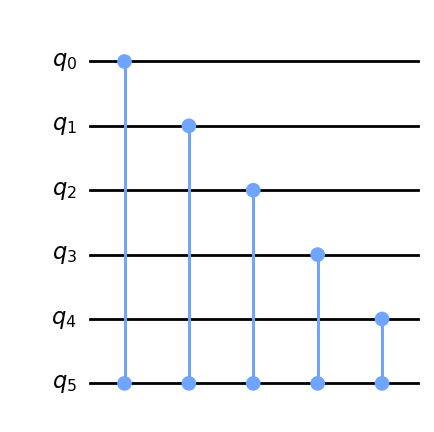

In [30]:
no_of_qubits = 6
no_of_search_space = 2**no_of_qubits

oracle = QuantumCircuit(no_of_qubits, name="oracle")

for i in range(no_of_qubits-1): 
    oracle.cz(i,no_of_qubits-1)

oracle.to_gate()

oracle.draw(output="mpl")

In [31]:
OracleTest = QuantumCircuit(no_of_qubits, name="OracleTest")
OracleTest.h(range(no_of_qubits))
OracleTest.append(oracle, range(no_of_qubits))
from IPython.display import Latex
from qiskit.visualization import state_visualization
state = Statevector(OracleTest)
print (state)
state.draw(output="latex", )

prefix = "$$\\begin{align}"
suffix = "\\end{align}$$"
state_to_latex = state_visualization._state_to_latex_ket(state.data, max_size = 128)

Latex(prefix + state_to_latex + suffix)


Statevector([ 0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
              0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
              0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
              0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
              0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
              0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,  0.125+0.j,
              0.125+0.j,  0.125+0.j,  0.125+0.j, -0.125+0.j, -0.125+0.j,
              0.125+0.j, -0.125+0.j,  0.125+0.j,  0.125+0.j, -0.125+0.j,
             -0.125+0.j,  0.125+0.j,  0.125+0.j, -0.125+0.j,  0.125+0.j,
             -0.125+0.j, -0.125+0.j,  0.125+0.j, -0.125+0.j,  0.125+0.j,
              0.125+0.j, -0.125+0.j,  0.125+0.j, -0.125+0.j, -0.125+0.j,
              0.125+0.j,  0.125+0.j, -0.125+0.j, -0.125+0.j,  0.125+0.j,
             -0.125+0.j,  0.125+0.j,  0.125+0.j, -0.125+0.j],
            dims=(2, 2, 2, 2, 2, 2))


<IPython.core.display.Latex object>

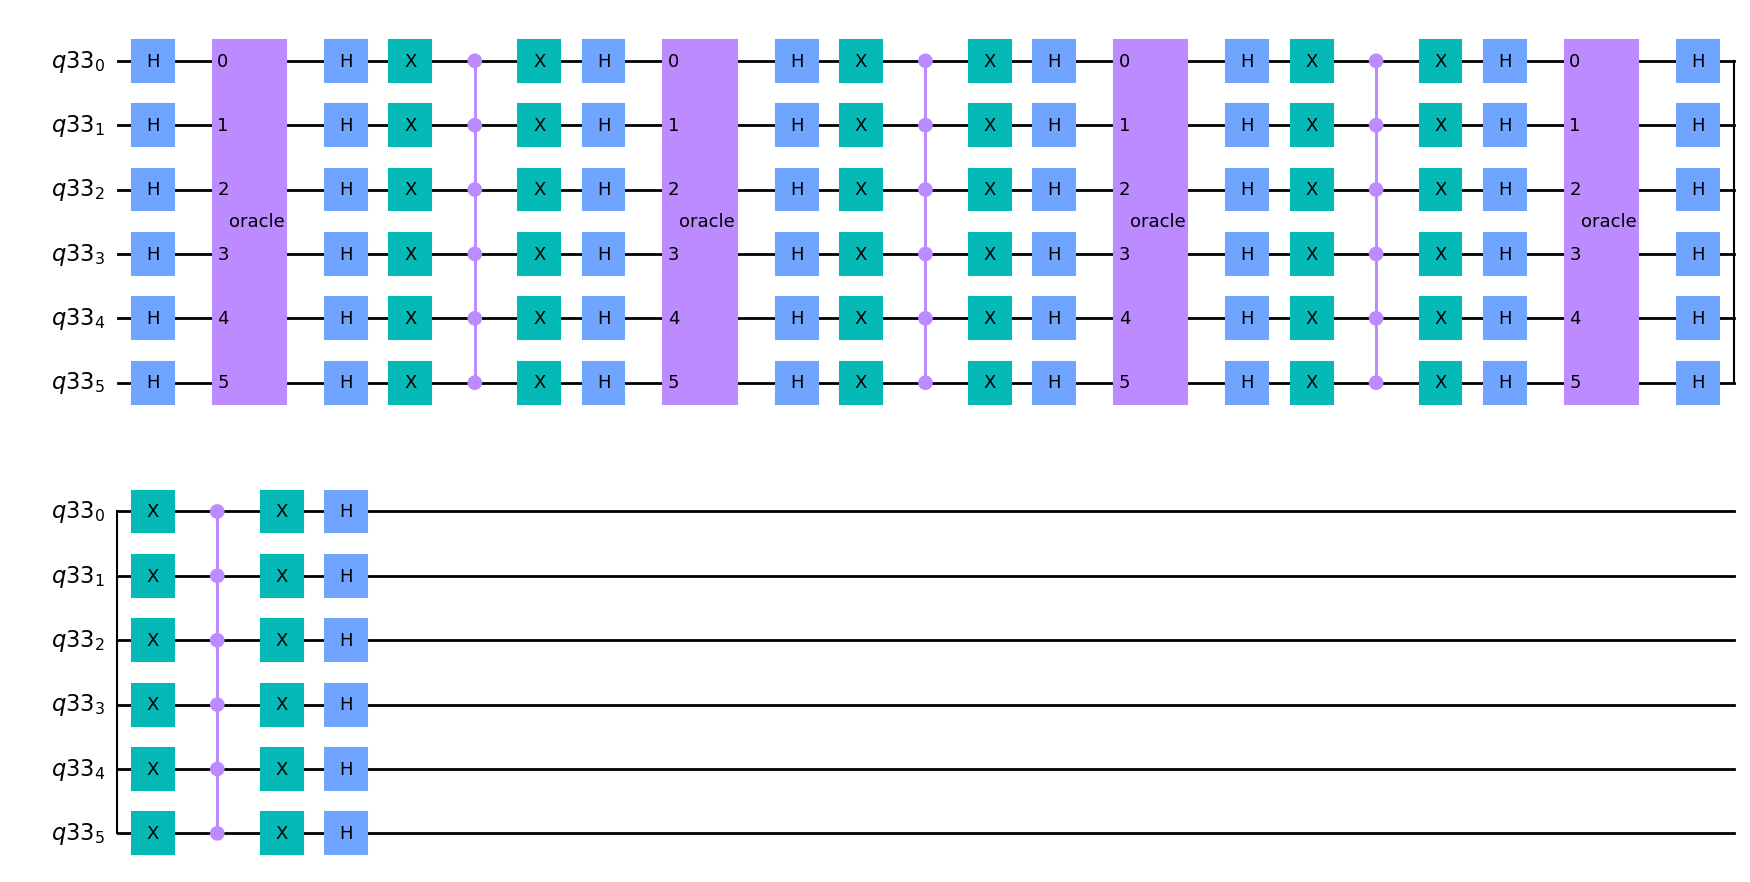

In [32]:
import operator
from qiskit import *
from qiskit.quantum_info.operators import Operator, Pauli
import math
from qiskit.circuit.library import ZGate

qreg = QuantumRegister(no_of_qubits)
creg = ClassicalRegister(no_of_qubits)
q = QuantumCircuit(qreg)

for i in range(no_of_qubits):
    q.h(i)

for i in range(int(2*math.sqrt(no_of_qubits))):
    q.append(oracle,range(no_of_qubits))

    cozgate = ZGate().control(no_of_qubits-1)

    for i  in range(1):
        q.h(range(no_of_qubits))
        q.x(range(no_of_qubits))

    q.append(cozgate, qreg)

    for i  in range(1):
        q.x(range(no_of_qubits))
        q.h(range(no_of_qubits))



q.draw(output="mpl")

Statevector([ 4.12149270e-16-5.11307346e-17j,
             -1.11022302e-16-1.79537781e-17j,
              2.77555756e-17+4.49675420e-18j,
              4.12149270e-16-1.28659453e-17j,
              0.00000000e+00-2.20661990e-17j,
              3.63083881e-16-5.91613781e-17j,
              3.82710037e-16-1.33186528e-17j,
             -8.32667268e-17+2.40314200e-17j,
              5.55111512e-17-1.50188849e-17j,
              4.41588504e-16-4.19225635e-17j,
              4.41588504e-16-7.03028020e-18j,
              0.00000000e+00+1.60083239e-17j,
              4.61214660e-16-5.97225058e-17j,
             -2.77555756e-17-2.67092417e-17j,
             -2.77555756e-17+2.64242121e-17j,
              3.14018492e-16-5.30310408e-18j,
             -5.55111512e-17-1.99629419e-17j,
              4.41588504e-16-5.60604648e-17j,
              4.02336193e-16-1.37956067e-17j,
             -2.77555756e-17+8.89586257e-18j,
              4.12149270e-16-5.72721138e-17j,
             -1.38777878e-16-2.395

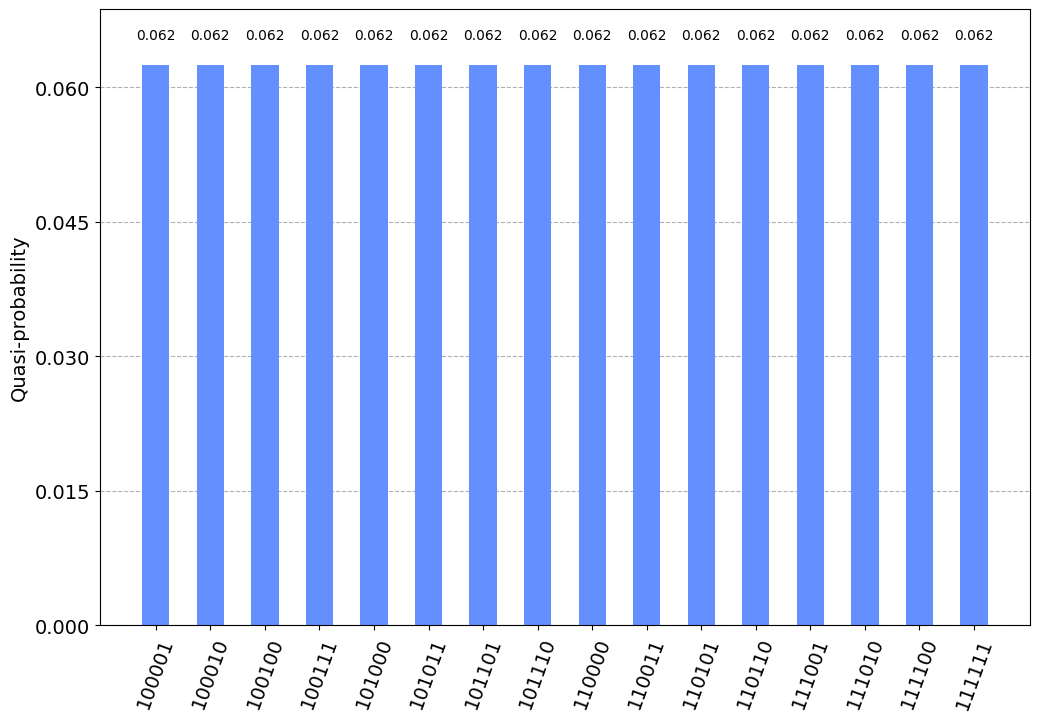

In [33]:
backend = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

q.save_statevector()   # Tell simulator to save statevector
result = backend.run(transpile(q, backend), shots=1000).result()
out_state = result.get_statevector()
np.around(out_state, 2)
print(out_state) # Display the output state vector
plot_histogram(result.get_counts(), figsize=(12,8))

In [34]:
import math
math.ceil(pi*math.sqrt(2**no_of_qubits)/4)

7